In [ ]:
from sklearn import svm,neighbors,naive_bayes,discriminant_analysis,neural_network,metrics,tree
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import sem
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,RFE,RFECV,SelectKBest, f_classif
import os

In [ ]:
# read csv from github
git_link = "https://raw.githubusercontent.com/Hangyu14/Anxiety-Detection/main/twoleveldata_hrvrrv.csv?token=GHSAT0AAAAAABWNHQ6RQFO4K3T7I4OKCA56YYMAT3A"
alldata_2 = pd.read_csv(git_link)
# print(alldata_2)
alldata_2 = alldata_2.iloc[:, 1:44]
feature = list(alldata_2.columns)
hrv_feature = list(alldata_2.iloc[:, 0:24].columns)
rrv_feature = list(alldata_2.iloc[:, 24:42].columns)
print(feature)
print(hrv_feature)
print(rrv_feature)
print(alldata_2.shape)

['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1', 'label']
['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2']
['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV

In [ ]:
# hrv_data = alldata_2[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD',  'HRV_MedianNN','HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','label']]
# rrv_data = alldata_2[['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_MedianBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1','label']]
# hrvrrv_data = alldata_2[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD',  'HRV_MedianNN','HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_MedianBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1','label']]
rrv_data = alldata_2[['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1','label']]
hrv_data = alldata_2[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'label']]
hrvrrv_data = alldata_2
print(hrv_data.columns)
print(hrv_data.shape)
print(rrv_data.columns)
print(rrv_data.shape)
print(hrvrrv_data.columns)
print(hrvrrv_data.shape)
print(hrv_data.iloc[:,:-1])

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF',
       'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1',
       'HRV_SD2', 'HRV_SD1SD2', 'label'],
      dtype='object')
(38138, 25)
Index(['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB',
       'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF',
       'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1',
       'RRV_SD2', 'RRV_SD2SD1', 'label'],
      dtype='object')
(38138, 19)
Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF',
       'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1',
       'HRV_SD2', 'HRV_SD1SD2', 'RRV_RMSSD',

In [ ]:

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


def confusion_plot(actual_classes,predicted_classes):
  
  cm = confusion_matrix(actual_classes, predicted_classes, normalize='true')
  ax = plt.subplot()
  sns.set(font_scale=1.5) # Adjust to fit
  sns.heatmap(cm, annot=True, ax=ax, cmap="Blues",square=True);  

  # Labels, title and ticks
  label_font = {'size':'15'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('True labels', fontdict=label_font);

  title_font = {'size':'22'}  # Adjust to fit
  ax.set_title('Confusion Matrix', fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
  ax.xaxis.set_ticklabels(['Without Anxiety', 'With Anxiety']);
  ax.yaxis.set_ticklabels(['Without Anxiety', 'With Anxiety']);
  plt.show()


def train_classifier(inputdata,n_splits,classifier,classifier_name):
  kf = KFold(n_splits=n_splits,shuffle=True)
  k=0
  accuracy = 0
  acc_list = []
  cm_list = []
  I0 = pd.DataFrame()
  actual_classes = np.empty([0], dtype=int)
  predicted_classes = np.empty([0], dtype=int)
  
  print("-------------------------------------------------")
  print("The result of ",classifier_name)
  for train_index, test_index in kf.split(inputdata):  
      X_train, X_test = inputdata.iloc[train_index], inputdata.iloc[test_index]
      train_samples = len(X_train)
      test_samples = len(X_test)
      # input_train = X_train.iloc[:, 0:42]
      # input_test = X_test.iloc[:, 0:42]

      input_train = X_train.iloc[:,:-1]
      input_test = X_test.iloc[:,:-1]
      classfier_train = classifier
      classfier_train.fit(input_train,X_train['label'])
      y_pred = classfier_train.predict(input_test)
      accuracy_test = metrics.accuracy_score(X_test['label'], y_pred)

      actual_classes = np.append(actual_classes, X_test['label'])
      predicted_classes = np.append(predicted_classes, y_pred)
      k += 1
      print("Accuracy of fold k=", str(k),': ', accuracy_test)


      cm = confusion_matrix(X_test['label'], y_pred, normalize='true')
      acc_list.append(accuracy_test)
      cm_list.append(cm)
      accuracy += accuracy_test

  print('we have ',train_samples,' train samples')
  print('we have ',test_samples,' test samples')
  print("The average accuracy is: ", accuracy/n_splits)
  # print(I0)
  confusion_plot(actual_classes,predicted_classes)
  print(' ')
  return acc_list,cm_list



[4.60954645e+02 5.07408160e+02 2.23822494e+02 2.22776147e+02
 7.22538979e+02 3.57831906e+02 4.94678394e+02 5.20133176e+02
 6.62462855e+02 4.62114649e+02 5.61398892e+01 1.31742077e-01
 2.78989583e+02 1.78757884e+00 4.10362305e+02 1.42980160e+02
 2.01281445e+02 4.63219238e+01 7.32885893e+00 2.99085519e-01
 2.06059833e+02 2.22776147e+02 5.66601844e+02 1.83169421e+02]
['HRV_MeanNN' 'HRV_SDNN' 'HRV_RMSSD' 'HRV_SDSD' 'HRV_CVNN' 'HRV_CVSD'
 'HRV_MedianNN' 'HRV_MadNN' 'HRV_MCVNN' 'HRV_IQRNN' 'HRV_pNN50'
 'HRV_pNN20' 'HRV_HTI' 'HRV_TINN' 'HRV_LF' 'HRV_HF' 'HRV_VHF' 'HRV_LFHF'
 'HRV_LFn' 'HRV_HFn' 'HRV_LnHF' 'HRV_SD1' 'HRV_SD2' 'HRV_SD1SD2']
Feature 0: 460.954645
Feature 1: 507.408160
Feature 2: 223.822494
Feature 3: 222.776147
Feature 4: 722.538979
Feature 5: 357.831906
Feature 6: 494.678394
Feature 7: 520.133176
Feature 8: 662.462855
Feature 9: 462.114649
Feature 10: 56.139889
Feature 11: 0.131742
Feature 12: 278.989583
Feature 13: 1.787579
Feature 14: 410.362305
Feature 15: 142.980160
Feature

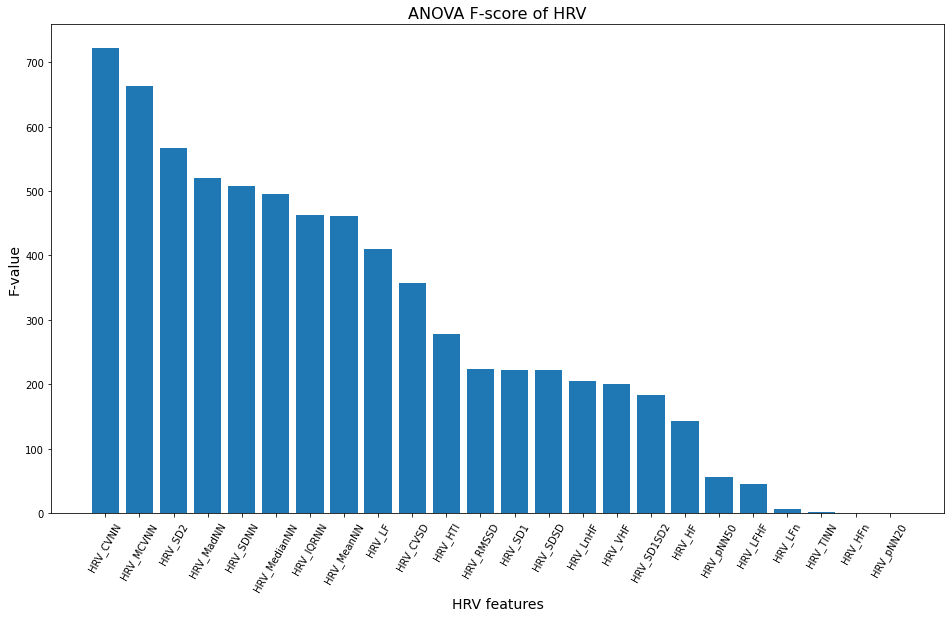

['HRV_CVNN', 'HRV_MCVNN', 'HRV_SD2', 'HRV_MadNN', 'HRV_SDNN', 'HRV_MedianNN', 'HRV_IQRNN', 'HRV_MeanNN', 'HRV_LF', 'HRV_CVSD', 'HRV_HTI', 'HRV_RMSSD', 'HRV_SD1', 'HRV_SDSD', 'HRV_LnHF', 'HRV_VHF', 'HRV_SD1SD2', 'HRV_HF', 'HRV_pNN50', 'HRV_LFHF', 'HRV_LFn', 'HRV_TINN', 'HRV_HFn', 'HRV_pNN20']
[ 30.36688871 254.83150729 152.32420573  28.56572715 821.88645915
 540.54645704 446.45671651   7.1779197  505.26047771  11.12410134
  82.09987327  45.34159521 323.36286302  68.60589767  43.44155876
  28.56572715 328.64648555 425.11654001]
Feature 0: 30.366889
Feature 1: 254.831507
Feature 2: 152.324206
Feature 3: 28.565727
Feature 4: 821.886459
Feature 5: 540.546457
Feature 6: 446.456717
Feature 7: 7.177920
Feature 8: 505.260478
Feature 9: 11.124101
Feature 10: 82.099873
Feature 11: 45.341595
Feature 12: 323.362863
Feature 13: 68.605898
Feature 14: 43.441559
Feature 15: 28.565727
Feature 16: 328.646486
Feature 17: 425.116540


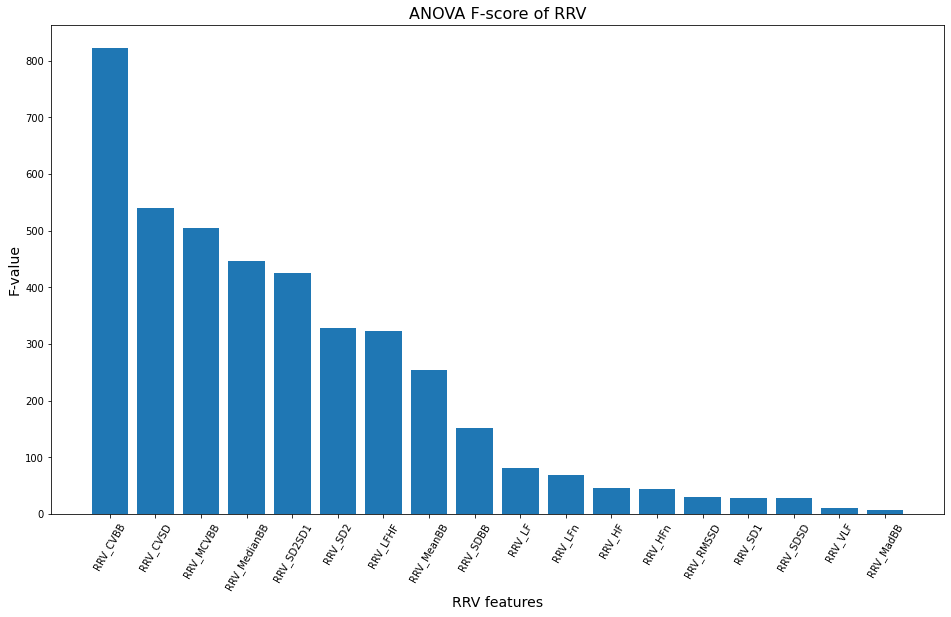

['RRV_CVBB', 'RRV_CVSD', 'RRV_MCVBB', 'RRV_MedianBB', 'RRV_SD2SD1', 'RRV_SD2', 'RRV_LFHF', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_LF', 'RRV_LFn', 'RRV_HF', 'RRV_HFn', 'RRV_RMSSD', 'RRV_SD1', 'RRV_SDSD', 'RRV_VLF', 'RRV_MadBB']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hrv_data_norm = normalize(hrv_data)
rrv_data_norm = normalize(rrv_data)
hrvrrv_data_norm = normalize(hrvrrv_data)

X_new = SelectKBest(f_classif, k="all").fit(hrv_data_norm.iloc[:, 0:24], hrv_data_norm['label'])
print(X_new.scores_)
print(X_new.feature_names_in_)
for i in range(len(X_new.scores_)):
	print('Feature %d: %f' % (i, X_new.scores_[i]))

indices = np.argsort(X_new.scores_)[::-1]
# To get your top 10 feature names
features = []
for i in range(24):
    features.append(hrv_data_norm.columns[indices[i]])
# Now plot
plt.rcParams['figure.figsize']=(16,9)
plt.bar(features, X_new.scores_[indices[range(24)]],align='center')
plt.xticks(rotation=60)
plt.title('ANOVA F-score of HRV',fontsize=16)
plt.xlabel("HRV features",fontsize=14)
plt.ylabel('F-value',fontsize=14)
plt.show()
print(features)

X_new = SelectKBest(f_classif, k="all").fit(rrv_data_norm.iloc[:, 0:18], rrv_data_norm['label'])
print(X_new.scores_)
for i in range(len(X_new.scores_)):
	print('Feature %d: %f' % (i, X_new.scores_[i]))
 
indices = np.argsort(X_new.scores_)[::-1]
# To get your top 10 feature names
features1 = []
for i in range(18):
    features1.append(rrv_data_norm.columns[indices[i]])
plt.bar(features1, X_new.scores_[indices[range(18)]],align='center')
plt.xticks(rotation=60)
plt.title('ANOVA F-score of RRV',fontsize=16)
plt.xlabel("RRV features",fontsize=14)
plt.ylabel('F-value',fontsize=14)
plt.show()
print(features1)



In [ ]:
classfier_svm = svm.SVC(C=1000)
classfier_knn = neighbors.KNeighborsClassifier(p=1,n_neighbors=55)
classfier_mlp = neural_network.MLPClassifier(max_iter=1000)
classfier_nb = naive_bayes.GaussianNB()

# hrv_data_norm1 = hrv_data_norm[['HRV_SD2', 'HRV_SDNN', 'HRV_MedianNN', 'HRV_MeanNN', 'HRV_LF', 'HRV_HTI', 'HRV_RMSSD', 'HRV_SD1', 'HRV_SDSD', 'HRV_LnHF', 'HRV_VHF', 'HRV_SD1SD2', 'HRV_HF', 'HRV_LFHF','label']]
# rrv_data_norm1 = rrv_data_norm [['RRV_MedianBB', 'RRV_SD2SD1', 'RRV_SD2', 'RRV_LFHF', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_LF', 'RRV_LFn', 'RRV_HF', 'RRV_HFn', 'label']]
# hrvrrv_data_norm1 = hrvrrv_data_norm[['HRV_SD2', 'HRV_SDNN', 'HRV_MedianNN', 'HRV_MeanNN', 'HRV_LF', 'HRV_HTI', 'HRV_RMSSD', 'HRV_SD1', 'HRV_SDSD', 'HRV_LnHF', 'HRV_VHF', 'HRV_SD1SD2', 'HRV_HF', 'HRV_LFHF','RRV_MedianBB', 'RRV_SD2SD1', 'RRV_SD2', 'RRV_LFHF', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_LF', 'RRV_LFn', 'RRV_HF', 'RRV_HFn', 'label']]
hrv_data_norm1 = hrv_data_norm[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN','HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN','HRV_pNN50', 'HRV_HTI', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF','HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','label']]
rrv_data_norm1 = rrv_data_norm[['RRV_MeanBB', 'RRV_SDBB', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB','RRV_MCVBB', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn','RRV_SD2', 'RRV_SD2SD1','label']]
hrvrrv_data_norm1 = hrvrrv_data_norm[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN','HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN','HRV_pNN50', 'HRV_HTI', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF','HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2','RRV_MeanBB', 'RRV_SDBB', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB','RRV_MCVBB', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn','RRV_SD2', 'RRV_SD2SD1','label']]
'''
# acc_list_svm1, cm_svm1 = train_classifier(hrv_data_norm1,10,classifier=classfier_svm,classifier_name="SVM")
# acc_list_knn1, cm_knn1 = train_classifier(hrv_data_norm1,10,classifier=classfier_knn,classifier_name="KNN")
# acc_list_mlp1, cm_mlp1 = train_classifier(hrv_data_norm1,10,classifier=classfier_mlp,classifier_name="MLP")
# boxplot_data1 = [acc_list_svm1,acc_list_knn1,acc_list_mlp1]
# cm_data1 = [cm_svm1,cm_knn1,cm_mlp1]
# print(cm_data1)
# print(boxplot_data1)

acc_list_svm2,cm_svm2 = train_classifier(rrv_data_norm,10,classifier=classfier_svm,classifier_name="SVM")
acc_list_knn2,cm_knn2 = train_classifier(rrv_data_norm1,10,classifier=classfier_knn,classifier_name="KNN")
acc_list_mlp2,cm_mlp2 = train_classifier(rrv_data_norm1,10,classifier=classfier_mlp,classifier_name="MLP")



# boxplot_data = [acc_list_svm,acc_list_knn,acc_list_mlp,acc_list_nb]
boxplot_data2 = [acc_list_svm2,acc_list_knn2,acc_list_mlp2]
print(boxplot_data2)
cm_data2 = [cm_svm2,cm_knn2,cm_mlp2]
print(cm_data2)

acc_list_svm3,cm_svm3 = train_classifier(hrvrrv_data_norm1,10,classifier=classfier_svm,classifier_name="SVM")
acc_list_knn3,cm_knn3 = train_classifier(hrvrrv_data_norm1,10,classifier=classfier_knn,classifier_name="KNN")
acc_list_mlp3,cm_mlp3 = train_classifier(hrvrrv_data_norm1,10,classifier=classfier_mlp,classifier_name="MLP")
boxplot_data3 = [acc_list_svm3,acc_list_knn3,acc_list_mlp3]
print(boxplot_data3)

cm_data3 = [cm_svm3,cm_knn3,cm_mlp3]
print(cm_data3)
'''

In [ ]:

# svm1= [0.8143681174619821, 0.8109596224436287, 0.8264289459884635, 0.8033560566334557, 0.8206607236497115, 0.8219716832721552, 0.8303618248557945, 0.8146303093864709, 0.8080251770259638, 0.8088119590873328]
print(np.mean(acc_list_mlp2))
print(np.std(acc_list_mlp2))


0.7573550576499051
0.00899478632735787


In [ ]:
def result(inputdata,classifier,classifier_name):
  print('//////////==========================///////////')
  print("The result of ",classifier_name)
  X = inputdata.iloc[:,:-1]
  y = inputdata['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print(X_train.shape)
  print(X_test.shape)
  clf = classifier
  cv = KFold(n_splits=10,shuffle=True)
  scores = cross_val_score(clf, X_train, y_train, cv=cv,n_jobs =-1)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy_test = metrics.accuracy_score(y_test, y_pred)
  confusion_plot(y_test,y_pred)
  print('Accuracy on Test data is:',accuracy_test)


classfier_svm = svm.SVC(C=100,gamma=100)
classfier_mlp = neural_network.MLPClassifier(max_iter=1000)
classfier_knn = neighbors.KNeighborsClassifier(p=2,n_neighbors=55)

result(hrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(hrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")
# result(hrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(hrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")

result(rrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")
result(rrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(rrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")

result(hrvrrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")
result(hrvrrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(hrvrrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")


//////////==========================///////////
The result of  KNN
(30510, 20)
(7628, 20)
0.87 accuracy with a standard deviation of 0.01


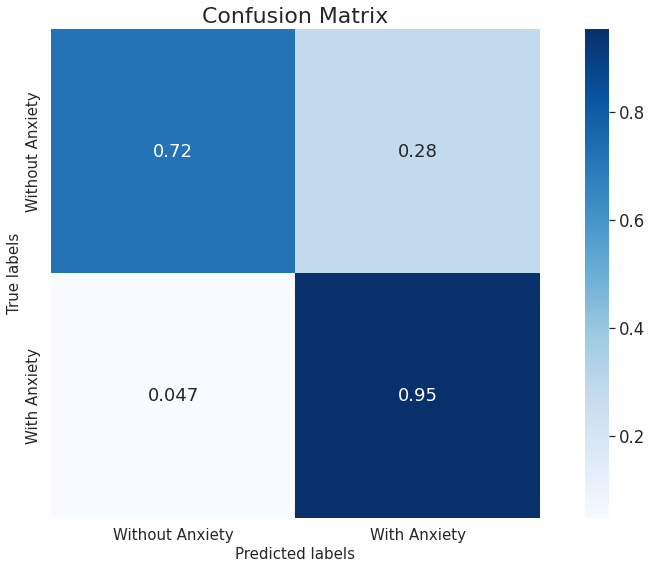

Accuracy on Test data is: 0.87860513896172
//////////==========================///////////
The result of  KNN
(30510, 13)
(7628, 13)
0.80 accuracy with a standard deviation of 0.01


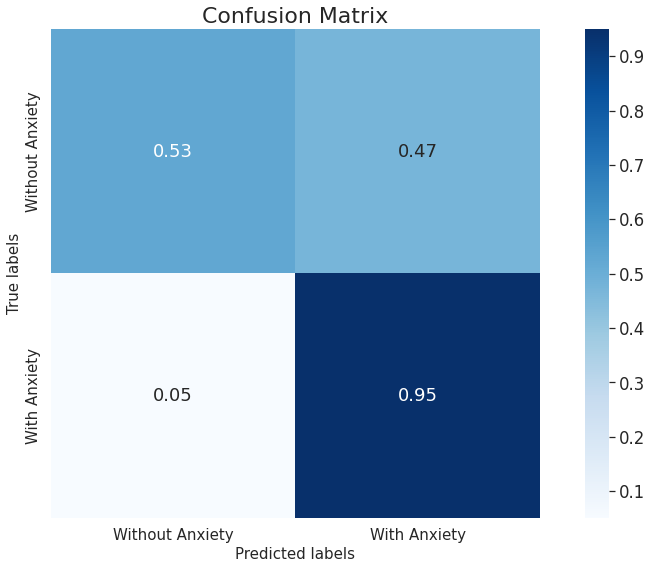

Accuracy on Test data is: 0.8177766124803356
//////////==========================///////////
The result of  KNN
(30510, 33)
(7628, 33)
0.93 accuracy with a standard deviation of 0.01


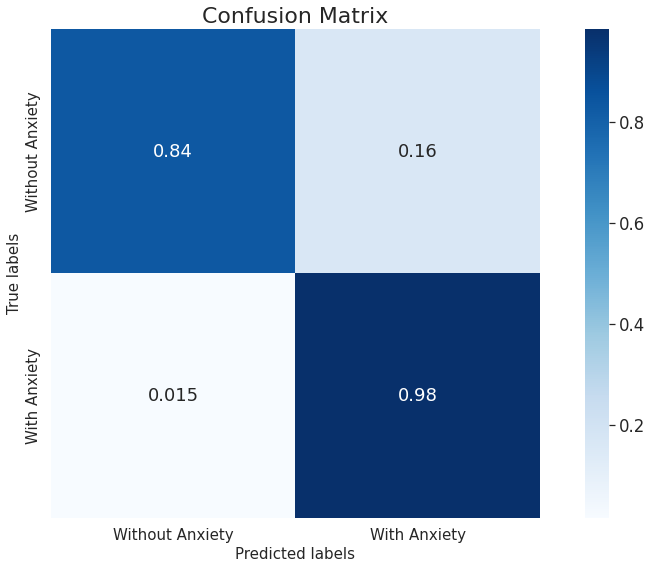

Accuracy on Test data is: 0.9383848977451494


In [ ]:
classfier_knn = neighbors.KNeighborsClassifier(p=1,n_neighbors=55)
result(hrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(rrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")
result(hrvrrv_data_norm1,classifier=classfier_knn,classifier_name="KNN")

//////////==========================///////////
The result of  MLP
(30510, 20)
(7628, 20)
0.92 accuracy with a standard deviation of 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


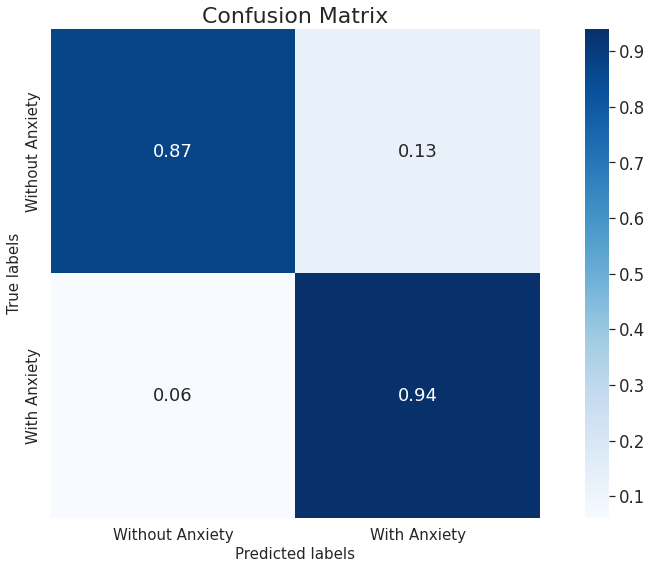

Accuracy on Test data is: 0.9191137912952281
//////////==========================///////////
The result of  MLP
(30510, 13)
(7628, 13)
0.84 accuracy with a standard deviation of 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


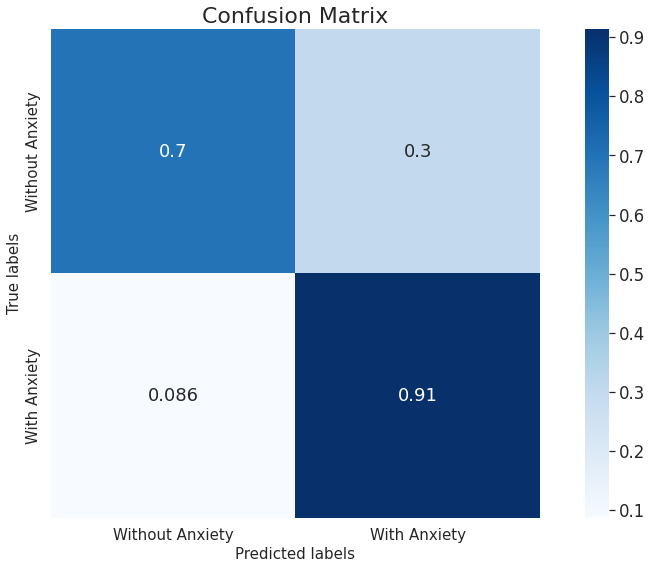

Accuracy on Test data is: 0.8466177241740954
//////////==========================///////////
The result of  MLP
(30510, 33)
(7628, 33)
0.99 accuracy with a standard deviation of 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


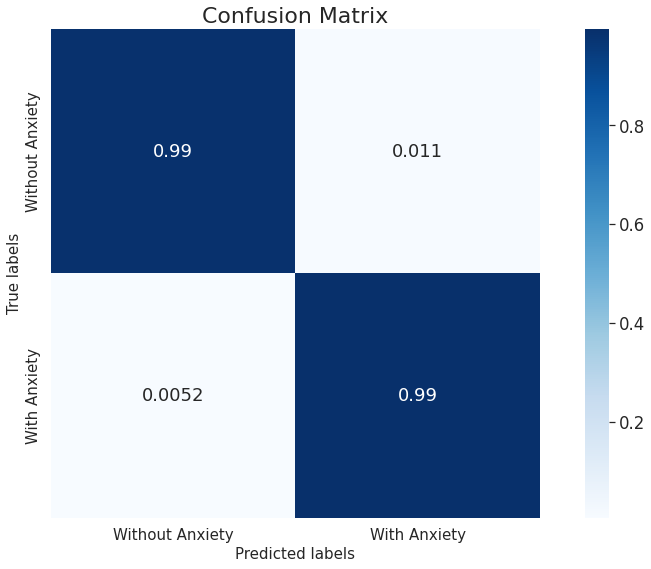

Accuracy on Test data is: 0.9929208180388044


In [ ]:
classfier_mlp = neural_network.MLPClassifier(activation ='tanh',max_iter=200,hidden_layer_sizes=(50,100,50))
result(hrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")
result(rrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")
result(hrvrrv_data_norm1,classifier=classfier_mlp,classifier_name="MLP")

//////////==========================///////////
The result of  SVM
(30510, 20)
(7628, 20)
0.90 accuracy with a standard deviation of 0.00


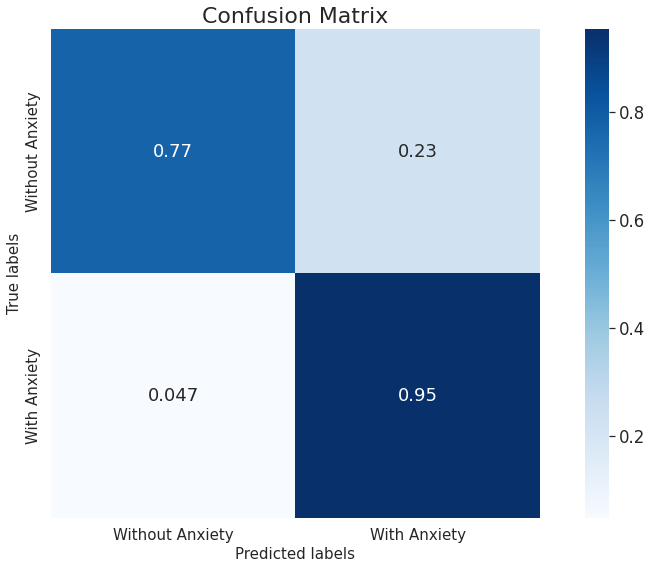

Accuracy on Test data is: 0.8970896696381752
//////////==========================///////////
The result of  SVM
(30510, 13)
(7628, 13)


In [ ]:
def result(inputdata,classifier,classifier_name):
  print('//////////==========================///////////')
  print("The result of ",classifier_name)
  X = inputdata.iloc[:,:-1]
  y = inputdata['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print(X_train.shape)
  print(X_test.shape)
  clf = classifier
  cv = KFold(n_splits=10,shuffle=True)
  scores = cross_val_score(clf, X_train, y_train, cv=cv,n_jobs =-1)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy_test = metrics.accuracy_score(y_test, y_pred)
  confusion_plot(y_test,y_pred)
  print('Accuracy on Test data is:',accuracy_test)

classfier_svm = svm.SVC(C=100,gamma=10)
result(hrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")
result(rrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")
result(hrvrrv_data_norm1,classifier=classfier_svm,classifier_name="SVM")

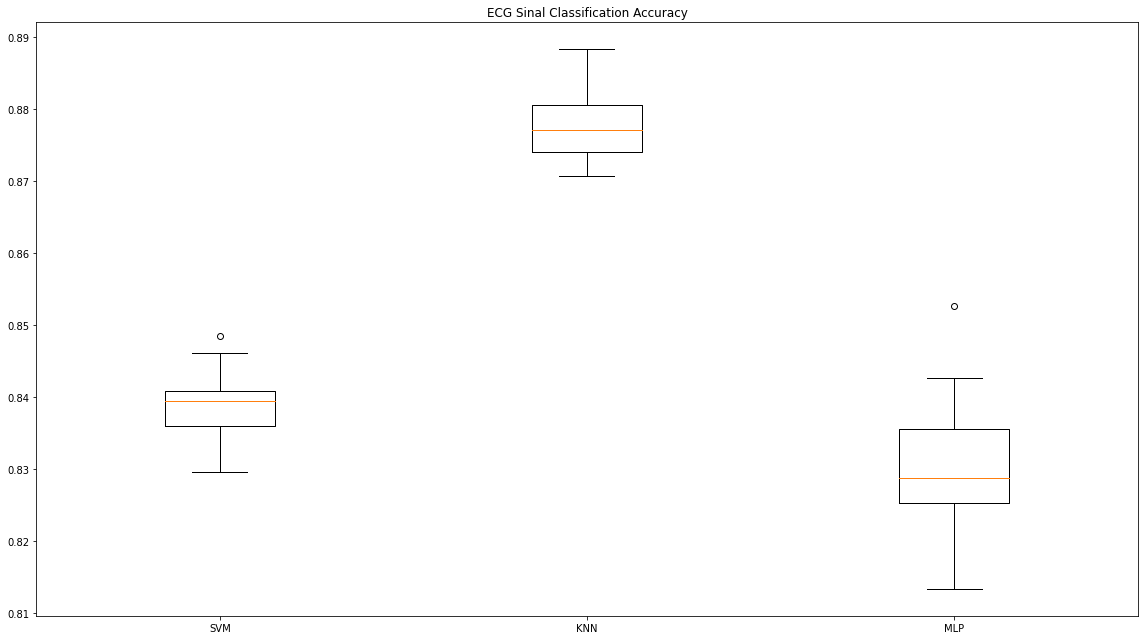

In [ ]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.set_title('ECG Sinal Classification Accuracy')
ax1.set_xticklabels(['SVM','KNN','MLP'])
plt.boxplot(boxplot_data1)
plt.tight_layout() 
plt.show()

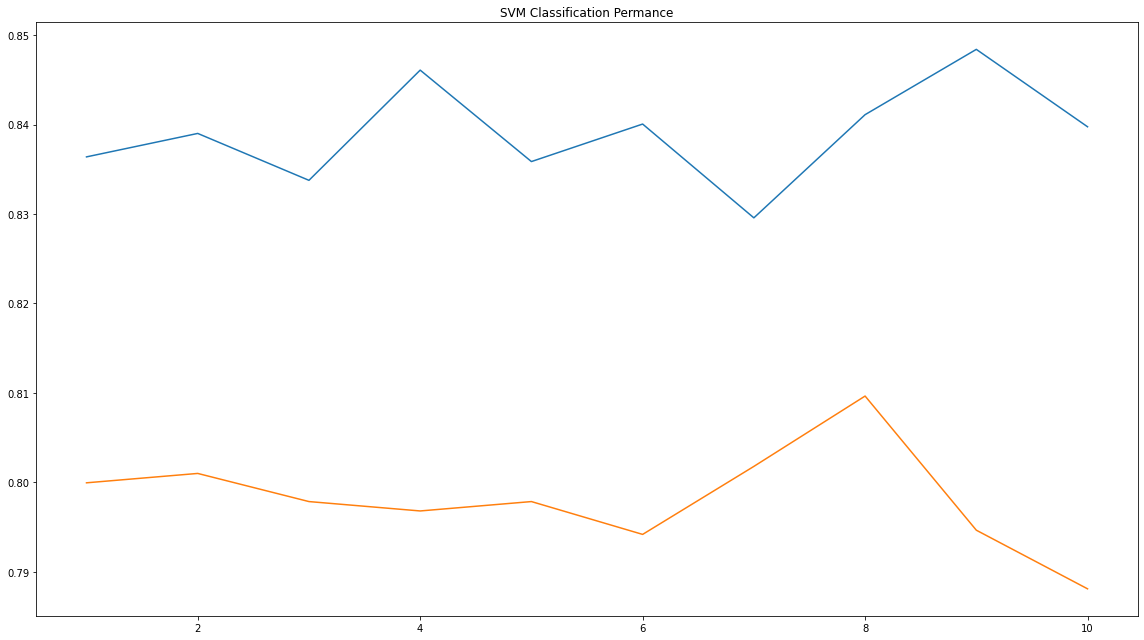

In [ ]:
fig = plt.figure()
ax1 = plt.subplot()
x = [1,2,3,4,5,6,7,8,9,10]
ax1.set_title('SVM Classification Permance')
# ax1.set_xticklabels(['HRV','RSP','BOTH'])
# plt.boxplot([boxplot_data1[0],boxplot_data2[0],boxplot_data3[0]])
plt.plot(x,boxplot_data1[0],label = 'ECG')
plt.plot(x,boxplot_data2[0],label = 'RSP')
plt.tight_layout() 
plt.show()

[1.01345476e+02 5.50635800e+02 3.59767026e+02 3.59944037e+02
 5.34045275e+01 1.64145357e+01 5.67038988e+02 3.93972496e+02
 8.03011444e+02 7.60954255e+02 6.82197239e-02]
Feature 0: 101.345476
Feature 1: 550.635800
Feature 2: 359.767026
Feature 3: 359.944037
Feature 4: 53.404527
Feature 5: 16.414536
Feature 6: 567.038988
Feature 7: 393.972496
Feature 8: 803.011444
Feature 9: 760.954255
Feature 10: 0.068220


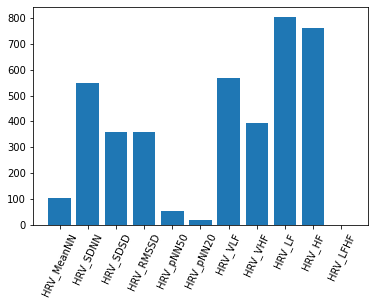

-------------------------------------------------
The result of  SVM
Accuracy of fold k= 1 :  0.9934640522875817
Accuracy of fold k= 2 :  0.9847383720930233
Accuracy of fold k= 3 :  0.9811046511627907
Accuracy of fold k= 4 :  0.9898255813953488
Accuracy of fold k= 5 :  0.9905523255813954
Accuracy of fold k= 6 :  0.9861918604651163
Accuracy of fold k= 7 :  0.9869186046511628
Accuracy of fold k= 8 :  0.9832848837209303
Accuracy of fold k= 9 :  0.9861918604651163
Accuracy of fold k= 10 :  0.9869186046511628
we have  12385  train samples
we have  1376  test samples
The average accuracy is:  0.9869190796473628
 
-------------------------------------------------
The result of  KNN
Accuracy of fold k= 1 :  0.9985475671750181
Accuracy of fold k= 2 :  0.9963662790697675
Accuracy of fold k= 3 :  0.998546511627907
Accuracy of fold k= 4 :  0.9949127906976745
Accuracy of fold k= 5 :  0.998546511627907
Accuracy of fold k= 6 :  0.9978197674418605
Accuracy of fold k= 7 :  0.998546511627907
Accuracy of

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy of fold k= 9 :  0.9941860465116279
Accuracy of fold k= 10 :  0.998546511627907
we have  12385  train samples
we have  1376  test samples
The average accuracy is:  0.9965844606576482
 
-------------------------------------------------
The result of  NB
Accuracy of fold k= 1 :  0.8300653594771242
Accuracy of fold k= 2 :  0.8030523255813954
Accuracy of fold k= 3 :  0.8175872093023255
Accuracy of fold k= 4 :  0.8277616279069767
Accuracy of fold k= 5 :  0.8335755813953488
Accuracy of fold k= 6 :  0.8241279069767442
Accuracy of fold k= 7 :  0.8241279069767442
Accuracy of fold k= 8 :  0.8161337209302325
Accuracy of fold k= 9 :  0.8183139534883721
Accuracy of fold k= 10 :  0.815406976744186
we have  12385  train samples
we have  1376  test samples
The average accuracy is:  0.821015256877945
 


ConversionError: ignored

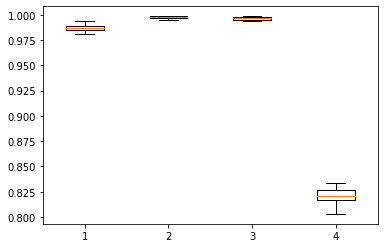

In [ ]:
import matplotlib.pyplot as plt
norm_alldata = normalize(alldata_2)
# print(norm_alldata)
# X_new = SelectKBest(f_classif, k="all").fit(alldata_2.iloc[:, 1:12], alldata_2['label'])
X_new = SelectKBest(f_classif, k="all").fit(norm_alldata.iloc[:, 1:12], norm_alldata['label'])
print(X_new.scores_)
for i in range(len(X_new.scores_)):
	print('Feature %d: %f' % (i, X_new.scores_[i]))
# plot the scores
plt.bar(feature, X_new.scores_) #
plt.xticks(rotation=65)
plt.show()
# print(norm_alldata.iloc[:, 1:12])
classfier_svm = svm.SVC(C=100)
classfier_knn = neighbors.KNeighborsClassifier(n_neighbors=25)
classfier_mlp = neural_network.MLPClassifier(max_iter=1000)
classfier_nb = naive_bayes.GaussianNB()


acc_list_svm = train_classifier(norm_alldata,10,classifier=classfier_svm,classifier_name="SVM")
acc_list_knn = train_classifier(norm_alldata,10,classifier=classfier_knn,classifier_name="KNN")
acc_list_mlp = train_classifier(norm_alldata,10,classifier=classfier_mlp,classifier_name="MLP")
acc_list_nb =  train_classifier(norm_alldata,10,classifier=classfier_nb,classifier_name="NB")

boxplot_data = [acc_list_svm,acc_list_knn,acc_list_mlp,acc_list_nb]
plt.boxplot(boxplot_data)
# plt.xticks(['SVM','KNN','MLP','NB'])
plt.show()

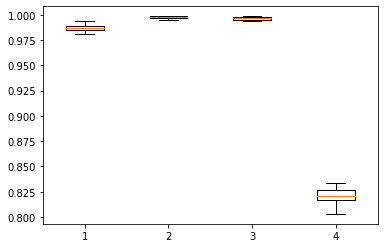

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.boxplot(boxplot_data)
plt.show()

df = pd.DataFrame.from_records(boxplot_data)
from google.colab import files
df.to_csv('acc.csv', encoding = 'utf-8-sig') 
files.download('acc.csv')

In [ ]:
kf = KFold(n_splits=10,shuffle=True)
k = 0
I0 = pd.DataFrame()
for item in feature:
  input_feature = alldata_2[[item,'label']]
  print(input_feature)
  print('for selected feature',item)
  for train_index, test_index in kf.split(input_feature):
    X_train, X_test = input_feature.iloc[train_index], input_feature.iloc[test_index]
    X_train[item].reshape(-1,1)
    classfier_svm = svm.SVC(C=10)
    classfier_svm.fit(X_train[item],X_train['label']) 
    y_pred_svm = classfier_svm.predict(X_test.iloc[:, 0])
    accuracy_svm = metrics.accuracy_score(X_test['label'], y_pred_svm)
    k += 1
    print("Accuracy SVM fold k=", str(k), ': ', accuracy_svm)


       HRV_MeanNN  label
0      762.101562    1.0
1      774.628571    1.0
2      756.951899    1.0
3      756.734177    1.0
4      756.516456    1.0
...           ...    ...
13756  646.064795    0.0
13757  646.077922    0.0
13758  646.008639    0.0
13759  645.913607    0.0
13760  645.874730    0.0

[13761 rows x 2 columns]
for selected feature HRV_MeanNN


AttributeError: ignored

In [ ]:
kf = KFold(n_splits=10,shuffle=True)
k = 0
I0 = pd.DataFrame()
#SVM classifier
for train_index, test_index in kf.split(alldata_3):  
    X_train, X_test = alldata_3.iloc[train_index], alldata_3.iloc[test_index]
    train_samples = len(X_train)
    test_samples = len(X_test)
    classfier_svm = svm.SVC(C=10) #kernel = 'linear', C=100
    # a=X_train.iloc[:, 0:11].isnull().sum().sum()
    # print(a)
    # classfier_svm.fit(X_train.iloc[:, 0:11],X_train['label']) 
    # y_pred_svm = classfier_svm.predict(X_test.iloc[:, 0:11])
    # accuracy_svm = metrics.accuracy_score(X_test['label'], y_pred_svm)
    k += 1
    # print("Accuracy SVM fold k=", str(k), ': ', accuracy_svm)
    # r = permutation_importance(classfier_svm, X_test.iloc[:, 0:11],X_test['label'],
    #     scoring='accuracy')
    # I = pd.DataFrame({'Importance':r.importances_mean})
    # I0 = pd.concat([I0,I],axis=1)
    
    sfs = SequentialFeatureSelector(neighbors.KNeighborsClassifier(p=400,n_neighbors=25), n_features_to_select=8)
    sfs.fit(X_train.iloc[:, 1:12],X_train['label'])
    #print(I)
    print(sfs.get_support())
print(' ')


[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False  True False False]
[ True  True  True  True  True  True  True False  True False False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
[ True  True  True  True  True  True  True False False  True False]
 


In [ ]:
!nvidia-smi

Fri Jul 22 10:15:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# NB classifier
k=0
accuracy = 0
I0 = pd.DataFrame()
kf = KFold(n_splits=10,shuffle=True)
for train_index, test_index in kf.split(norm_alldata):  
    X_train, X_test = norm_alldata.iloc[train_index], norm_alldata.iloc[test_index]
    train_samples = len(X_train)
    test_samples = len(X_test)
    classfier_nb = svm.SVC(C=10)#naive_bayes.GaussianNB()
    classfier_nb.fit(X_train.iloc[:, 1:12],X_train['label'])
    y_pred_mlp = classfier_nb.predict(X_test.iloc[:, 1:12])
    accuracy_nb = metrics.accuracy_score(X_test['label'], y_pred_mlp)
    # classfier_nb.fit(X_train[['HRV_MeanNN','HRV_VLF','HRV_LF','HRV_HF']],X_train['label'])
    # y_pred_mlp = classfier_nb.predict(X_test[['HRV_MeanNN','HRV_VLF','HRV_LF','HRV_HF']])
    # accuracy_nb = metrics.accuracy_score(X_test['label'], y_pred_mlp)
    # k += 1
    print("Accuracy NB fold k=", str(k), ': ', accuracy_nb)
    accuracy += accuracy_nb
    r = permutation_importance(classfier_nb, X_test.iloc[:, 1:12],X_test['label'],scoring='accuracy')
    I = pd.DataFrame({'Importance':r.importances_mean})
    I0 = pd.concat([I0,I],axis=1)
print(accuracy/10)
print(I0)
print(' ')

Accuracy NB fold k= 0 :  0.9571532316630356
Accuracy NB fold k= 0 :  0.9498546511627907
Accuracy NB fold k= 0 :  0.9549418604651163
Accuracy NB fold k= 0 :  0.9563953488372093
Accuracy NB fold k= 0 :  0.9498546511627907
Accuracy NB fold k= 0 :  0.9542151162790697
Accuracy NB fold k= 0 :  0.9556686046511628
Accuracy NB fold k= 0 :  0.9462209302325582
Accuracy NB fold k= 0 :  0.9614825581395349
Accuracy NB fold k= 0 :  0.9614825581395349
0.9547269510732803
    Importance  Importance  Importance  Importance  Importance  Importance  \
0     0.209296    0.219331    0.212209    0.221657    0.213808    0.224128   
1     0.028468    0.029506    0.029215    0.033576    0.025000    0.028343   
2     0.009877    0.015116    0.015552    0.011337    0.011773    0.008576   
3     0.009877    0.015116    0.015552    0.011337    0.011773    0.008576   
4     0.131445    0.128924    0.122674    0.136047    0.132849    0.129070   
5     0.147567    0.151308    0.154942    0.153198    0.166424    0.16627

In [ ]:
kf = KFold(n_splits=10,shuffle=True)
k = 0
I0 = pd.DataFrame()
#SVM classifier
for train_index, test_index in kf.split(norm_alldata):  
    X_train, X_test = alldata_3.iloc[train_index], alldata_3.iloc[test_index]
    train_samples = len(X_train)
    test_samples = len(X_test)
    classfier_svm = svm.SVC(C=10,kernel="linear") #kernel = 'linear', C=100
    #selector_rfe = RFE(estimator=classfier_svm, n_features_to_select=8, step=1)
    #selector_rfe = selector_rfe.fit(X_train.iloc[:, 0:11],X_train['label'])
    #print(selector_rfe.support_)
    #print(selector_rfe.ranking_)
    selector_rfecv= RFECV(classfier_svm, step=1, cv=5)
    selector_rfecv=selector_rfecv.fit(X_train.iloc[:, 0:11],X_train['label'])
    print(selector_rfecv.support_)
    print(selector_rfecv.n_features_)

[ True False False False False False False False False False  True]
2
[ True  True False False False False  True False False False  True]
4
[ True  True False False False False  True False False False  True]
4
[ True  True False False False False False False False False  True]
3
